In [1]:
# %pip install anomalib

from __future__ import annotations

import os
from pathlib import Path
from typing import Any

from git.repo import Repo

current_directory = Path.cwd()
root_directory = current_directory.parent.parent
os.chdir(root_directory)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from pytorch_lightning import Trainer
from torchvision.transforms import ToPILImage

from anomalib.config import get_configurable_parameters
from anomalib.data import get_datamodule
from anomalib.data.utils import read_image
from anomalib.deploy import OpenVINOInferencer
from anomalib.models import get_model
from anomalib.pre_processing.transforms import Denormalize
from anomalib.utils.callbacks import LoadModelCallback, get_callbacks
from anomalib.data.folder import Folder
from anomalib.data.task_type import TaskType

In [9]:
MODEL = "fastflow"  # 'padim', 'cflow', 'stfpm', 'ganomaly', 'dfkde', 'patchcore'
CONFIG_PATH = root_directory / f"src/anomalib/models/{MODEL}/config.yaml"
config = get_configurable_parameters(config_path=CONFIG_PATH)

D:\145\anomalib\src\anomalib\config\config.py:280: UserWarning: config.project.unique_dir is set to False. This does not ensure that your results will be written in an empty directory and you may overwrite files.
  warn(


In [10]:
output_path = Path(config["project"]["path"])
print(output_path)
openvino_model_path = output_path / "weights" / "openvino" / "model.bin"
metadata = output_path / "weights" / "openvino" / "metadata.json"
print(openvino_model_path.exists(), metadata.exists())

inferencer = OpenVINOInferencer(
    path=openvino_model_path,  # Path to the OpenVINO IR model.
    metadata=metadata,  # Path to the metadata file.
    device="CPU",  # We would like to run it on an Intel CPU.
)

results\fastflow\mvtec\mappin\run
True True


In [11]:
import openvino.runtime as ov
print(ov.get_version())

2023.0.0-10926-b4452d56304-releases/2023/0


Good!


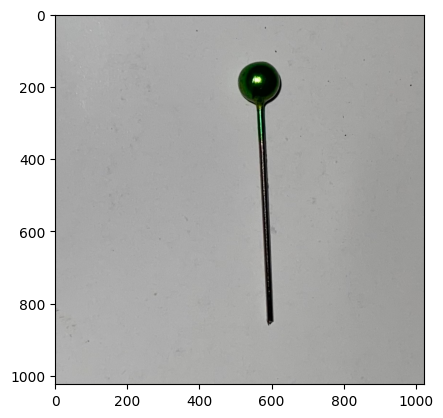

In [26]:
image_path = root_directory / "datasets/MVTec/mappin/test/short/01.png"
image_test = read_image(path="./datasets/MVTec/mappin/test/short/01.png")
plt.imshow(image_test)
predictions = inferencer.predict(image=image_test)
if predictions.pred_label:
    plt.imshow(predictions.segmentations)
else:
    print("Good!")